In [ ]:
!pip install --upgrade pip
!pip install numpy pandas matplotlib scikit-learn opencv-python pillow tqdm
!pip install tensorflow==2.14.0 # choose TF version compatible with your system
!pip install transformers sentencepiece # for pretrained NLP inference
!pip install streamlit # for final UI (optional)

✅ Dataset extracted!
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
✅ Classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


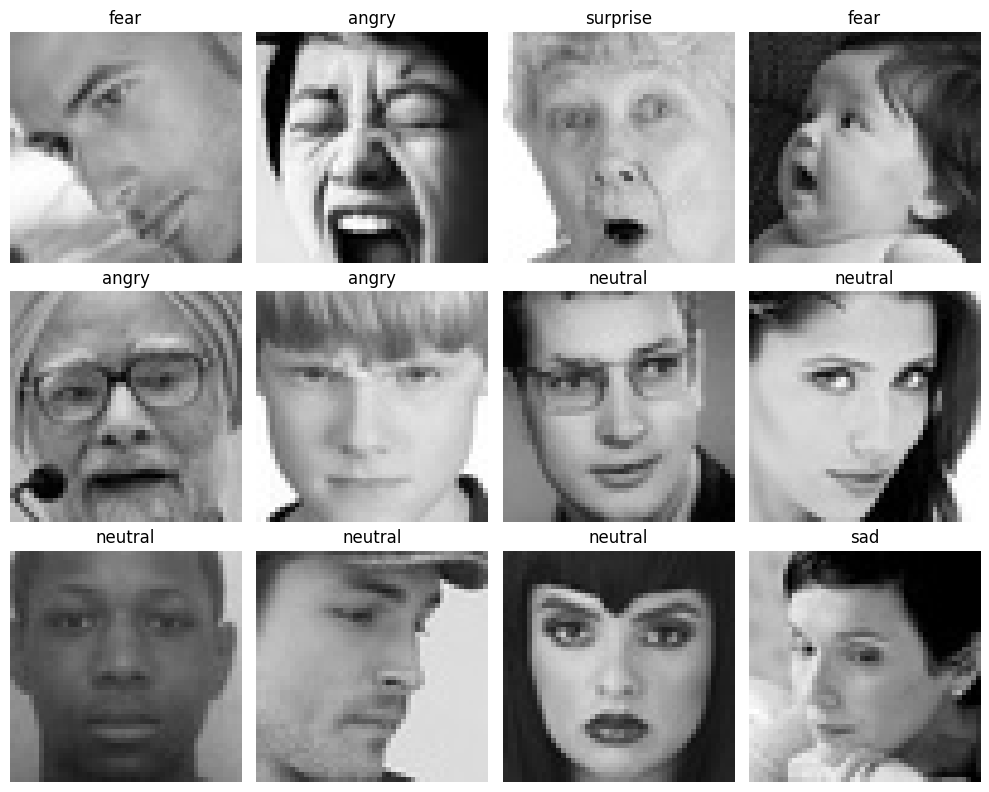

In [16]:
# ===============================
# Milestone 1: Dataset Preparation
# ===============================
import os, zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Paths
zip_path = "C:\\Users\\adity\\Downloads\\archive (3).zip"
extract_path = "/mnt/data/dataset"

# ✅ Extract dataset
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("✅ Dataset extracted!")

# Paths for train/test (fixed)
train_path = os.path.join(extract_path, "train")
val_path   = os.path.join(extract_path, "test")


# ===============================
# Data Generators
# ===============================
img_size = 48
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)


print("✅ Classes:", train_generator.class_indices)

# ===============================
# Show Sample Images
# ===============================
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_batch[i])
    plt.title(list(train_generator.class_indices.keys())[np.argmax(y_batch[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.3089 - loss: 1.7066 - val_accuracy: 0.4147 - val_loss: 1.5110
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.4274 - loss: 1.4734 - val_accuracy: 0.4724 - val_loss: 1.3730
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.4792 - loss: 1.3541 - val_accuracy: 0.5028 - val_loss: 1.2871
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.5127 - loss: 1.2792 - val_accuracy: 0.5226 - val_loss: 1.2372
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5353 - loss: 1.2255 - val_accuracy: 0.5323 - val_loss: 1.2123
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.5539 - loss: 1.1770 - val_accuracy: 0.5460 - val_loss: 1.1943
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.5696 - loss: 1.1356 - val_accuracy: 0.5485 - val_loss: 1.1846
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.5833 - loss: 1.1013 - 

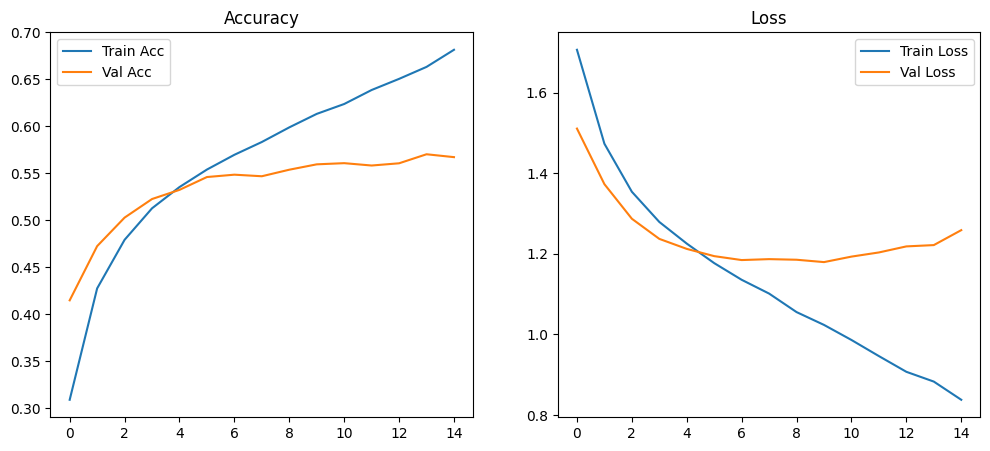

In [17]:

# Milestone 2: CNN Model

num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ===============================
# Milestone 3: Training
# ===============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


# Accuracy & Loss

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [1]:
import pandas as pd

music_df = pd.read_csv("C:\\Users\\adity\\Downloads\\archive (4)\\Music Info.csv")
music_df.head()


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [ ]:

import numpy as np

# Load dataset
#music_df = pd.read_csv("Music Info.csv")

def recommend_songs(emotion, n=5):
    if emotion == "sad":
        recs = music_df[(music_df['valence'] > 0.6) & (music_df['energy'] > 0.5)]
    elif emotion == "happy":
        recs = music_df[music_df['valence'] > 0.5]
    elif emotion == "angry":
        recs = music_df[(music_df['valence'] < 0.4) & (music_df['energy'] < 0.5)]
    elif emotion == "fear":
        recs = music_df[(music_df['valence'].between(0.4, 0.6)) & (music_df['energy'] < 0.6)]
    else:  # neutral or unknown
        recs = music_df.sample(n)
    
    if recs.empty:
        recs = music_df.sample(n)  # fallback
    
    return recs.sample(min(n, len(recs)))[['name','artist','spotify_preview_url','valence','energy']]

# Example usage:
emotion = "sad"  
print("Detected emotion:", emotion)
print(recommend_songs(emotion, n=5))


Detected emotion: sad
                    name              artist  \
31339    You Don't Wanna              Tricky   
13303  Conspiracy of One       The Offspring   
38899         The Planet          Gang Starr   
17239              Kelly             Van She   
1619         Stacy's Mom  Fountains of Wayne   

                                     spotify_preview_url  valence  energy  
31339  https://p.scdn.co/mp3-preview/a6510ac96c5b523a...    0.782   0.839  
13303  https://p.scdn.co/mp3-preview/85d1b6588a27f6d6...    0.748   0.959  
38899  https://p.scdn.co/mp3-preview/e75593a09fc5cecd...    0.607   0.725  
17239  https://p.scdn.co/mp3-preview/576f722b5b704fcc...    0.602   0.785  
1619   https://p.scdn.co/mp3-preview/20943ef75faadd4c...    0.915   0.729  
